**CONTEXT:** Company X curates and packages wine across various vineyards spread throughout the country.

**DATA DESCRIPTION:** The data concerns the chemical composition of the wine and its respective quality.
Attribute Information:
1. A, B, C, D: specific chemical composition measure of the wine
2. Quality: quality of wine [ Low and High ]


**PROJECT OBJECTIVE:** Goal is to build a synthetic data generation model using the existing data provided by the company.

In [44]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
%matplotlib inline

In [45]:
wdata = pd.read_excel('Part2 - Company.xlsx')

In [46]:
wdata.shape

(61, 5)

In [47]:
wdata.head()

,A,B,C,D,Quality
0,47,27,45,108,Quality A
1,174,133,134,166,Quality B
2,159,163,135,131,NaN
3,61,23,3,44,Quality A
4,59,60,9,68,Quality A


In [48]:
wdata.isna().sum()

A           0
B           0
C           0
D           0
Quality    18
dtype: int64

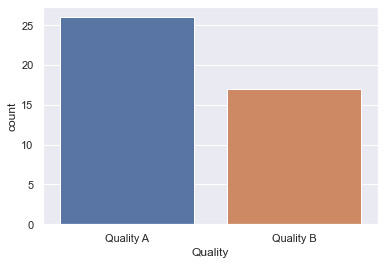

In [49]:
sns.set(style='darkgrid')
sns.countplot(x = 'Quality',
              data = wdata,
              order = wdata['Quality'].value_counts().index)
plt.show()

The target variable 'Quality' has 18 missing values.

In [50]:
# Since quality is a categorical data, lets impute missing
#values with the most frequestly occuring value
imp = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
wdata_imp = wdata.copy()
wdata_imp = imp.fit_transform(wdata)

In [51]:
wdata_df = pd.DataFrame(wdata_imp, columns=wdata.columns)

In [52]:
wdata_df.head()

,A,B,C,D,Quality
0,47,27,45,108,Quality A
1,174,133,134,166,Quality B
2,159,163,135,131,Quality A
3,61,23,3,44,Quality A
4,59,60,9,68,Quality A


In [53]:
wdata_vars = wdata_df.drop(columns=['Quality'])
wdata_vars.head()

,A,B,C,D
0,47,27,45,108
1,174,133,134,166
2,159,163,135,131
3,61,23,3,44
4,59,60,9,68


In [54]:
cluster_range = range(1,15)
cluster_errors = []
for num_clusters in cluster_range:
    clusters = KMeans(num_clusters, n_init = 5)
    clusters.fit(wdata_vars)
    labels = clusters.labels_
    centroids = clusters.cluster_centers_
    cluster_errors.append(clusters.inertia_)

clusters_df = pd.DataFrame({"num_clusters": cluster_range, "cluster_errors": cluster_errors})
clusters_df[0:15]

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


,num_clusters,cluster_errors
0,1,927628.852459
1,2,172153.266234
2,3,143212.395722
3,4,123442.587662
4,5,113244.596581
5,6,94820.446032
6,7,84840.608730
7,8,75123.929365
8,9,66420.060440
9,10,61022.022222


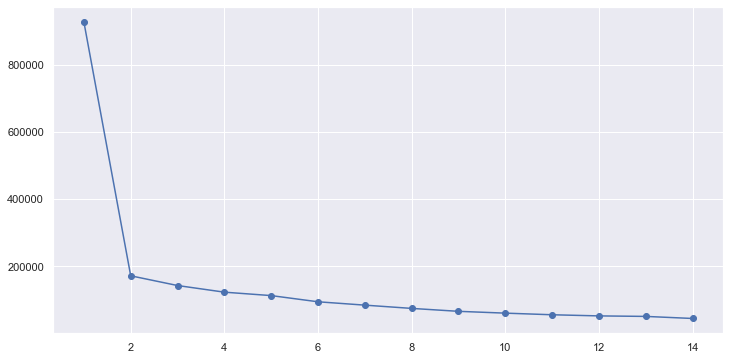

In [55]:
#identify the appropriate cluster to select using the elbow technique
from matplotlib import cm

plt.figure(figsize=(12,6))
plt.plot( clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o" );

In [56]:
kmeans = KMeans(n_clusters=2, n_init = 5, random_state=12345)
#kmeans.fit_predict method returns the array of cluster labels each data point belongs to.
wdata_vars['cluster'] = kmeans.fit_predict(wdata_vars)

In [57]:
wdata_vars.sample(10)

,A,B,C,D,cluster
13,45,76,56,57,1
58,88,39,9,102,1
15,196,145,166,132,0
5,153,140,154,199,0
39,102,5,59,72,1
59,180,157,192,198,0
0,47,27,45,108,1
12,27,106,57,37,1
1,174,133,134,166,0
25,103,74,59,17,1


In [58]:
#wdata_com = wdata_df.merge(wdata_vars[['cluster']])
wdata_com = pd.concat([wdata_df, wdata_vars['cluster']], axis=1)
wdata_com.head()

,A,B,C,D,Quality,cluster
0,47,27,45,108,Quality A,1
1,174,133,134,166,Quality B,0
2,159,163,135,131,Quality A,0
3,61,23,3,44,Quality A,1
4,59,60,9,68,Quality A,1


In [59]:
wdata_com= wdata_com.replace("Quality A",1)
wdata_com =wdata_com.replace("Quality B",0)

In [60]:
wdata_com['Quality'].corr(wdata_com['cluster'])

0.5725588978088239

There is a 57% correlation between the predicted clusters and the original tagged quality 

In [61]:
wdata_com.sample(15)

,A,B,C,D,Quality,cluster
24,101,104,95,49,1,1
7,191,144,143,154,1,0
57,137,182,165,199,1,0
5,153,140,154,199,1,0
15,196,145,166,132,0,0
44,22,9,25,76,1,1
38,44,104,8,21,1,1
22,3,63,109,67,1,1
9,145,178,158,141,1,0
8,160,181,194,178,0,0
